In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Loading data, handeling missing values

In [2]:
data = pd.read_excel('/home/minimiri/Documents/studium/projects/body_data/period.ods')

In [3]:
data.drop(['Unnamed: 7'], axis=1, inplace=True)

In [4]:
data.dropna(axis=0, how='all', inplace=True) # Date is never None!

In [20]:
data.head()

,Date,Temperature,Period,Libido,Pain,Chocolate,Sad,Kommentar,Energie,Month,Year,Day,Cyclestart
0,2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,1,0.0
1,2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,2,0.0
2,2020-10-03,36.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,3,0.0
3,2020-10-04,36.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,4,1.0
4,2020-10-05,36.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,5,0.0


## Feature Engineering

In [6]:
data['Month'] = pd.DatetimeIndex(data.Date).month
data['Year'] = pd.DatetimeIndex(data.Date).year
data['Day'] = pd.DatetimeIndex(data.Date).day

In [83]:
data[['Period', 'Libido', 'Pain', 'Chocolate', 'Sad', 'Energie']] = data[['Period', 'Libido', 'Pain', 'Chocolate', 'Sad', 'Energie']].fillna(0)

In [17]:
# get markers of Cyclestart 
data['Cyclestart'] = data.Period.apply(lambda x: 1.0 if x == 1 else 0)

previous1 = 0
for key, value in data.Cyclestart.iteritems():
    if data.Cyclestart.iloc[key] == 1.0 and previous == 0:
        previous = 1
        
    elif data.Cyclestart.iloc[key] == 1.0 and previous != 0:
        data.Cyclestart.iloc[key] = 0
        previous = 1
    
    else:
        previous = data.Cyclestart.iloc[key]

/home/minimiri/anaconda3/envs/period/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# data['Cyleday'] !!

In [18]:
# plot cycles
indices = [i for i, x in enumerate(data.Cyclestart) if x == 1]
indices

[3, 30, 84, 108, 138, 151, 171, 198, 225]

In [72]:
for i in range(len(indices)-1):
    print(data.Date[indices[i]])

2020-10-04 00:00:00
2020-10-31 00:00:00
2020-12-24 00:00:00
2021-01-17 00:00:00
2021-02-16 00:00:00
2021-03-01 00:00:00
2021-03-21 00:00:00
2021-04-17 00:00:00


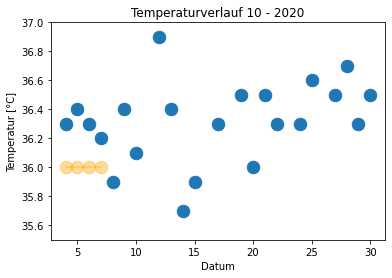

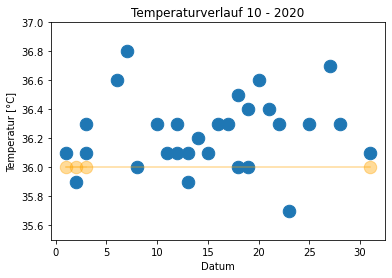

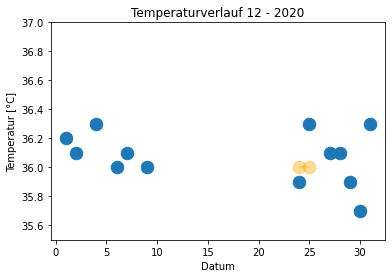

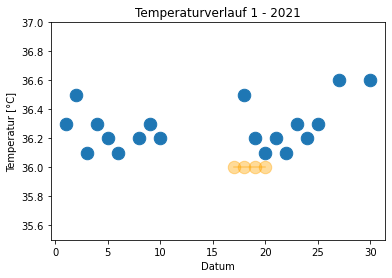

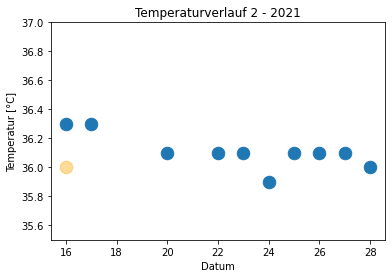

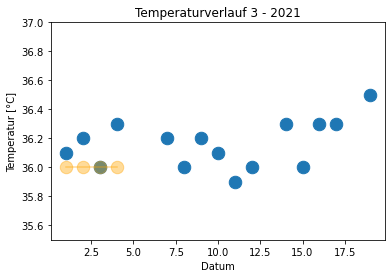

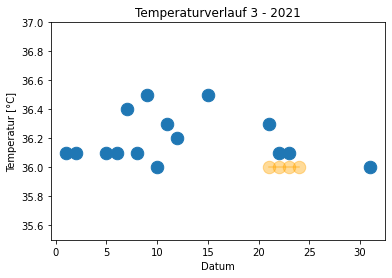

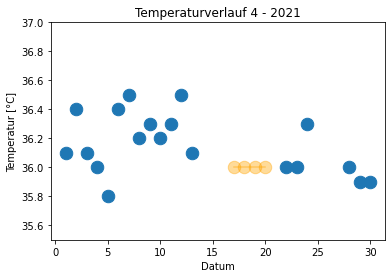

In [70]:
for i in range(len(indices)-1):
    plt.plot(data[indices[i]:indices[i+1]].Day, data[indices[i]:indices[i+1]].Temperature, marker='.', linestyle='', markersize=25)
    plt.plot(data[indices[i]:indices[i+1]].Day, data[indices[i]:indices[i+1]].Period*36, alpha=0.4, marker='.', linestyle='-', c='orange', markersize=25)
    plt.title('Temperaturverlauf {} - {}'.format(data.Month[indices[i]], data.Year[indices[i]]))
    plt.xlabel('Datum')
    plt.ylabel('Temperatur [°C]')
    plt.ylim(35.5, 37.0)
    plt.show()


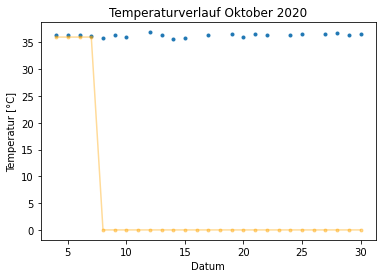

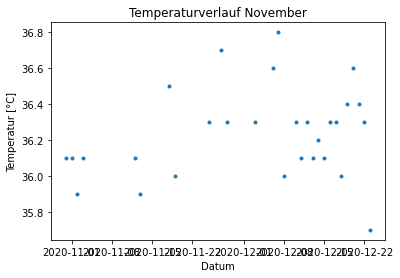

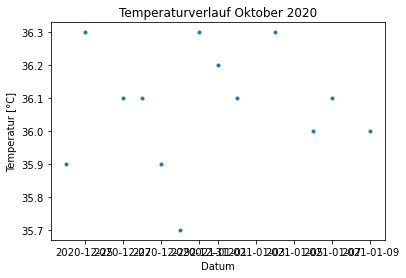

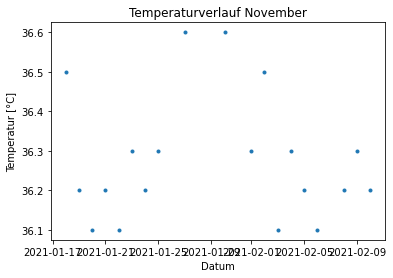

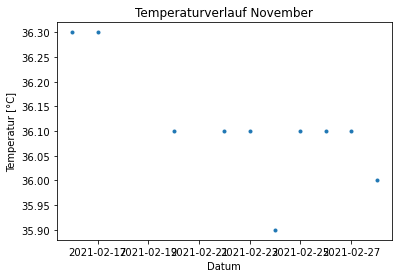

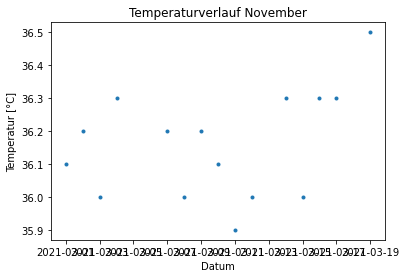

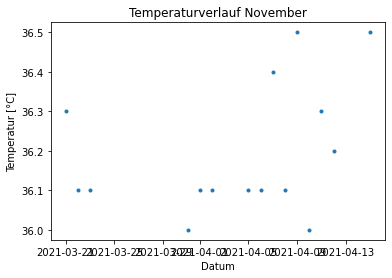

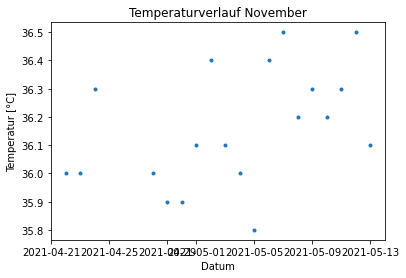

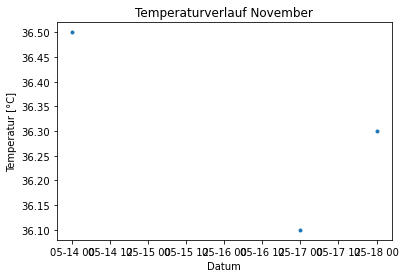

In [117]:
plt.plot(data[3:30].Day, data[3:30].Temperature, marker='.', linestyle='')
plt.plot(data[3:30].Day, data[3:30].Period*36, alpha=0.4, marker='.', linestyle='-', c='orange')
plt.title('Temperaturverlauf Oktober 2020')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[30:84].Date, data[30:84].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf November')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[84:108].Date, data[84:108].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf Oktober 2020')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[108:138].Date, data[108:138].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf November')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[138:151].Date, data[138:151].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf November')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[151:171].Date, data[151:171].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf November')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[171:198].Date, data[171:198].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf November')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[198:225].Date, data[198:225].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf November')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[225:].Date, data[225:].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf November')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()


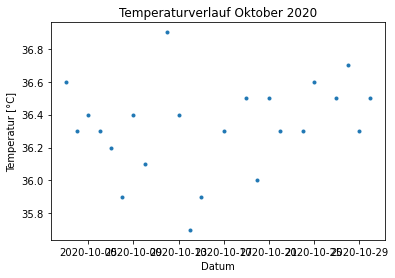

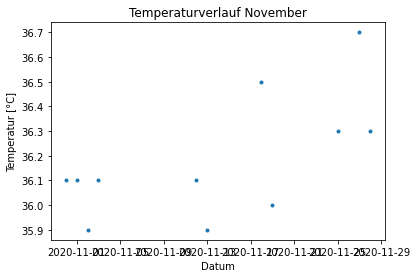

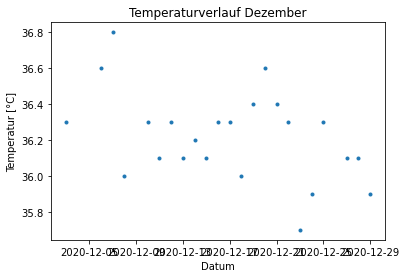

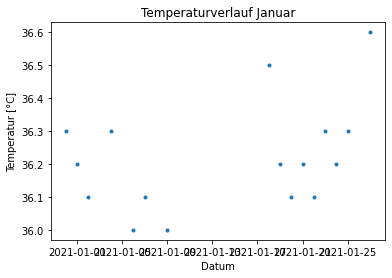

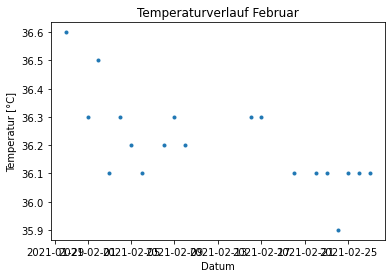

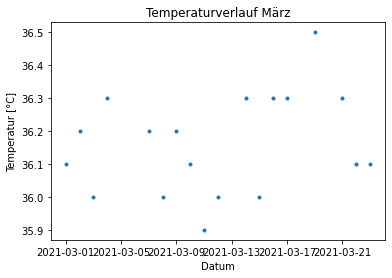

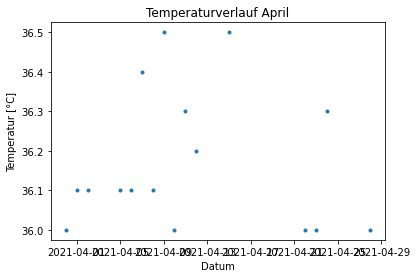

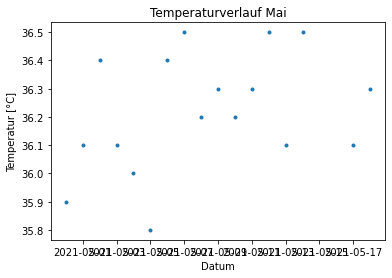

In [9]:
plt.plot(data[0:30].Date, data[0:30].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf Oktober 2020')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[30:60].Date, data[30:60].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf November')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[61:90].Date, data[61:90].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf Dezember')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[91:120].Date, data[91:120].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf Januar')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[121:150].Date, data[121:150].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf Februar')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[151:180].Date, data[151:180].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf März')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[181:210].Date, data[181:210].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf April')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()

plt.plot(data[211:240].Date, data[211:240].Temperature, marker='.', linestyle='')
plt.title('Temperaturverlauf Mai')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()


In [17]:
data.head()

,Date,Temperature,Period,Libido,Pain,Chocolate,Sad,Kommentar,Energie,Month,Year,Day
0,2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,1
1,2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,2
2,2020-10-03,36.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,3
3,2020-10-04,36.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,4
4,2020-10-05,36.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,5


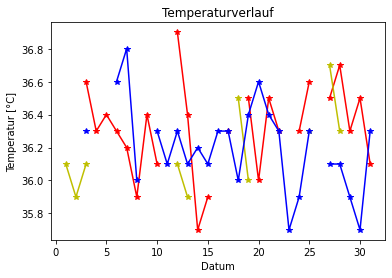

In [100]:
plt.plot(data[data.Month == 10].Day, data[data.Month == 10].Temperature, marker='*', linestyle='-', c='r')
#plt.plot(data[data.Month == 10].Day, data[data.Month == 10].Cyclestart, alpha=0.4, marker='*', linestyle='', c='r')

plt.plot(data[data.Month == 11].Day, data[data.Month == 11].Temperature, marker='*', linestyle='-', c='y')
#plt.plot(data[data.Month == 11].Day, data[data.Month == 11].Cyclestart, alpha=0.4, marker='*', linestyle='', c='y')

plt.plot(data[data.Month == 12].Day, data[data.Month == 12].Temperature, marker='*', linestyle='-', c='b')
#plt.plot(data[data.Month == 12].Day, data[data.Month == 12].Cyclestart, alpha=0.4, marker='*', linestyle='', c='b')

plt.title('Temperaturverlauf')
plt.xlabel('Datum')
_= plt.ylabel('Temperatur [°C]')
plt.show()

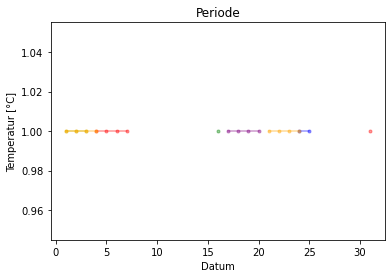

In [35]:
plt.plot(data[data.Month == 10].Day, data[data.Month == 10].Period, alpha=0.4, marker='.', linestyle='-', c='r')
plt.plot(data[data.Month == 11].Day, data[data.Month == 11].Period, alpha=0.4, marker='.', linestyle='-', c='y')
plt.plot(data[data.Month == 12].Day, data[data.Month == 12].Period, alpha=0.4, marker='.', linestyle='-', c='b')
plt.plot(data[data.Month == 1].Day, data[data.Month == 1].Period, alpha=0.4, marker='.', linestyle='-', c='purple')
plt.plot(data[data.Month == 2].Day, data[data.Month == 2].Period, alpha=0.4, marker='.', linestyle='-', c='g')
plt.plot(data[data.Month == 3].Day, data[data.Month == 3].Period, alpha=0.4, marker='.', linestyle='-', c='orange')
plt.title('Periode')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()

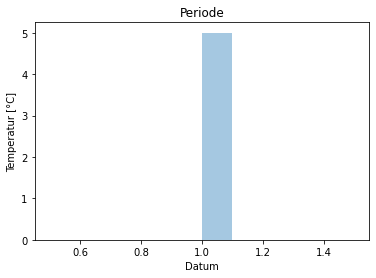

In [42]:
plt.hist(data[data.Month == 10].Period, alpha=0.4)
#plt.hist(data[data.Month == 11].Day, data[data.Month == 11].Period, alpha=0.4)
#plt.hist(data[data.Month == 12].Day, data[data.Month == 12].Period, alpha=0.4)
#plt.hist(data[data.Month == 1].Day, data[data.Month == 1].Period, alpha=0.4)
#plt.hist(data[data.Month == 2].Day, data[data.Month == 2].Period, alpha=0.4)
#plt.hist(data[data.Month == 3].Day, data[data.Month == 3].Period, alpha=0.4)
plt.title('Periode')
plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.show()

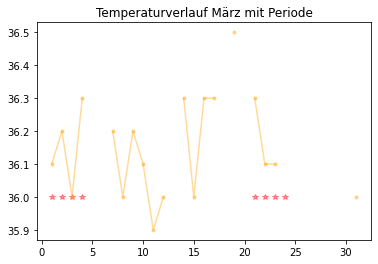

In [55]:
plt.plot(data[data.Month == 3].Day, data[data.Month == 3].Period*36, alpha=0.4, marker='*', linestyle='', c='red')
plt.plot(data[data.Month == 3].Day, data[data.Month == 3].Temperature, alpha=0.4, marker='.', linestyle='-', c='orange')
_= plt.title('Temperaturverlauf März mit Periode')

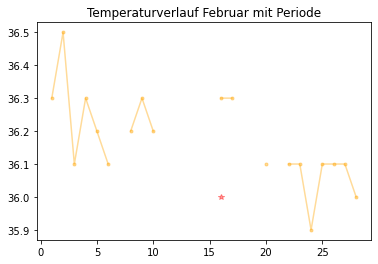

In [56]:
plt.plot(data[data.Month == 2].Day, data[data.Month == 2].Period*36, alpha=0.4, marker='*', linestyle='', c='red')
plt.plot(data[data.Month == 2].Day, data[data.Month == 2].Temperature, alpha=0.4, marker='.', linestyle='-', c='orange')
_=plt.title('Temperaturverlauf Februar mit Periode')

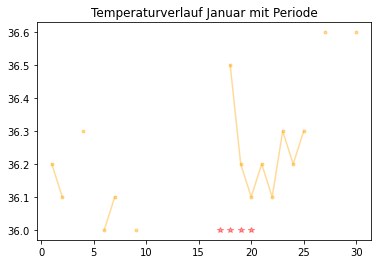

In [57]:
plt.plot(data[data.Month == 1].Day, data[data.Month == 1].Period*36, alpha=0.4, marker='*', linestyle='', c='red')
plt.plot(data[data.Month == 1].Day, data[data.Month == 1].Temperature, alpha=0.4, marker='.', linestyle='-', c='orange')
_=plt.title('Temperaturverlauf Januar mit Periode')

In [ ]:
'''
Der Verlauf der Temperatur soll geplottet werden.
Allerdings kann nur über den Datum geplottet werden.
Stattdessen möchte ich über den Beginn Der Tage plotten.
Also den Zyklus darstellen, der Beginnt mit der Periode.
'''

In [ ]:
'''
Alternativ interessiert die durchschnittliche Temperatur an unterschiedlichen Tagen.

'''

In [67]:
months = data.Month.unique()
months

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

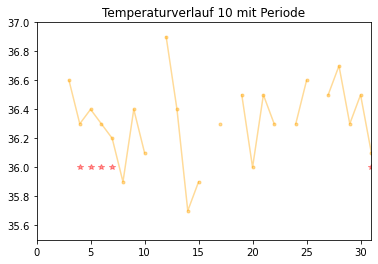

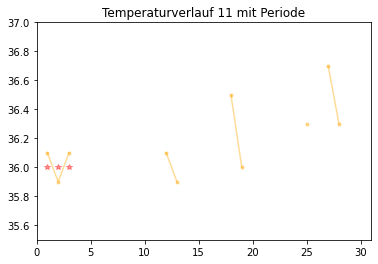

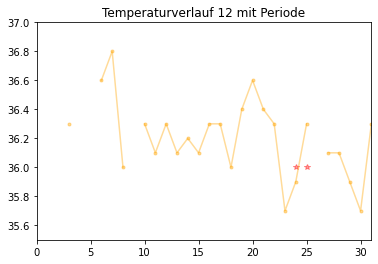

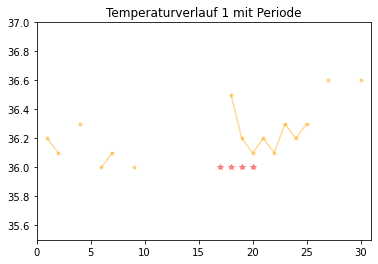

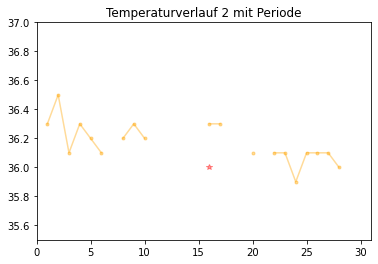

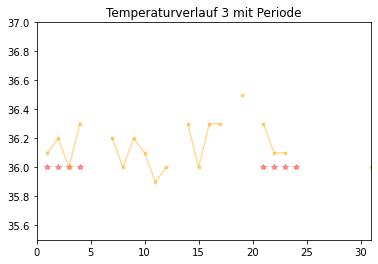

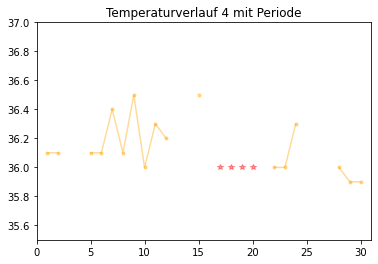

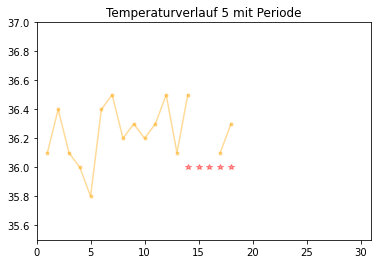

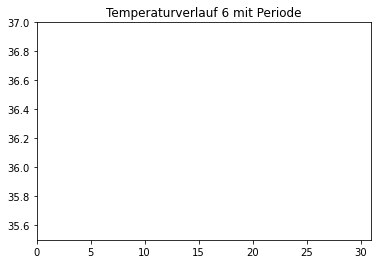

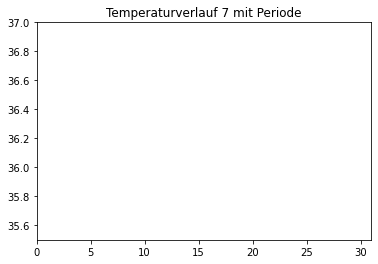

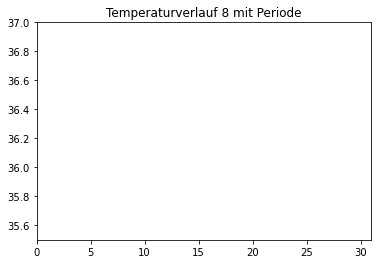

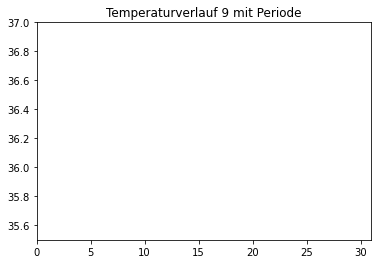

In [66]:
for month in months:
    plt.plot(data[data.Month == month].Day, data[data.Month == month].Period*36, alpha=0.4, marker='*', linestyle='', c='red')
    plt.plot(data[data.Month == month].Day, data[data.Month == month].Temperature, alpha=0.4, marker='.', linestyle='-', c='orange')
    plt.title('Temperaturverlauf %d mit Periode'%month)
    plt.xlim(0,31)
    plt.ylim(35.5, 37.0)
    plt.show()